In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# April 2024
# License: MIT

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, :2]  # We take only the first two features
y = iris.target

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [6]:
print(f'Training set accuracy: {clf.score(X_train, y_train):.4f}')
print(f'Test set accuracy: {clf.score(X_test, y_test):.4f}')

Training set accuracy: 0.8393
Test set accuracy: 0.8158


Plot the decision boundaries

In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(classifier, X, y, feature_names, class_labels, ax=None, legend='auto'):
    """Plot the decision boundaries of a classifier along with the dataset points.

    Parameters:
    - classifier: The trained classifier.
    - X: Feature dataset.
    - y: Target labels.
    - feature_names: List of feature names for labeling the axes.
    - class_labels: List of class labels for coloring the points.
    - ax: Matplotlib Axes object where the plot is drawn. If None, uses current axis.
    - legend: Controls the drawing of the legend. Use False to disable the legend.
    """
    if ax is None:
        ax = plt.gca()
        
    # Define colors and markers
    colors = ['red', 'cyan', 'blue']
    markers = ['s', 'o', '^']
    cmap = ListedColormap(colors[:len(class_labels)])
      
    # Setup mesh grid parameters
    resolution = 250  # Number of sample points in each axis
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1     
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution), 
                         np.linspace(y_min, y_max, resolution))
    
    # Classify each point in the mesh grid
    z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape) 
    
    # Generate contour plot
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.4)    
    
    # Plot the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=class_labels[y], style=class_labels[y], 
                    hue_order=class_labels, style_order=class_labels,
                    palette=colors, markers=markers, edgecolor='k', ax=ax, legend=legend)

    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])    

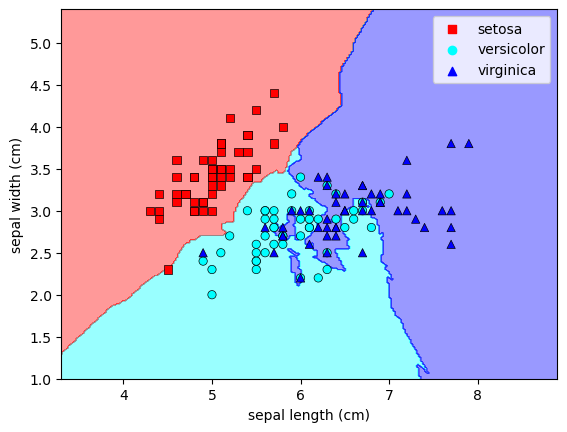

In [8]:
plot_decision_boundaries(clf, X, y, iris.feature_names[:2], iris.target_names)
plt.savefig('figures/iris_knn_decision_boundaries.pdf')

Choosing the number of neighbors

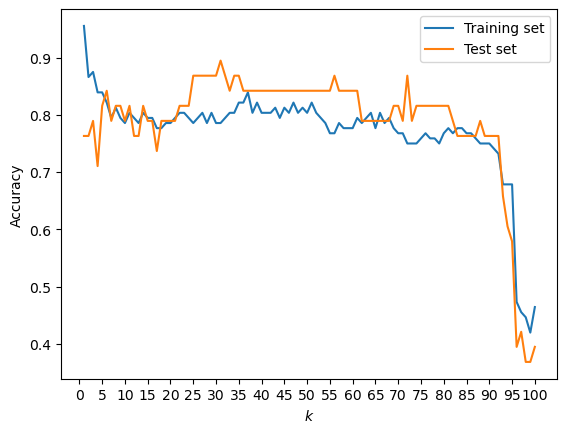

In [9]:
n_neighbors, train_scores, test_scores = [], [], []

for k in range(1, 101):
    n_neighbors.append(k)
    clf = KNeighborsClassifier(n_neighbors=k)    
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
    
plt.plot(n_neighbors, train_scores, label='Training set')
plt.plot(n_neighbors, test_scores, label='Test set')

plt.xlabel('$k$')
plt.ylabel('Accuracy')
plt.xticks(range(0, 101, 5))
plt.legend()
plt.savefig('figures/knn_accuracy_varying_k.pdf')

In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': np.arange(1, 51)  # Explore 1 to 50 neighbors
}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'n_neighbors': 29}


In [11]:
print(f'Training set accuracy: {grid.score(X_train, y_train):.4f}')
print(f'Test set accuracy: {grid.score(X_test, y_test):.4f}')

Training set accuracy: 0.8036
Test set accuracy: 0.8684


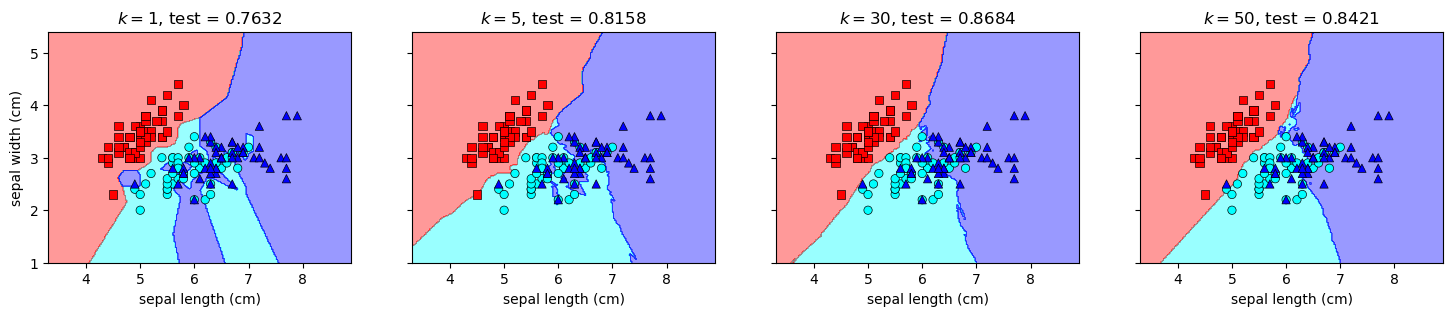

In [12]:
fig, axes = plt.subplots(1, 4, sharey='all', figsize=(18, 3))
k_values = [1, 5, 30, 50]

for ax, k in zip(axes, k_values):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    plot_decision_boundaries(clf, X, y, iris.feature_names[:2], iris.target_names, ax, legend=None)
    ax.set_title(f'$k = {k}$, test = {test_score:.4f}')
    
plt.savefig('figures/knn_decision_boundaries_varying_k.pdf', bbox_inches='tight')